In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#export
from xview2comp.nb_01 import *

In [3]:
from fastai.vision import models

# Model

### Unet

Use the Unet that is already available in fastai v1 to begin with.

In [42]:
c = 2
sz = 64

In [43]:
encoder = nn.Sequential(*list(models.resnet34().children())[:-2])

In [44]:
model = models.DynamicUnet(encoder, c, (sz, sz))

In [45]:
model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [25]:
models.DynamicUnet??

### Data

Get `DataBunch`, the data object for modeling.

In [35]:
SOURCE = Path('data/')

In [46]:
bs = 4

In [47]:
fnames = get_files(SOURCE/'train'/'train'/'images', extensions=['.png',])
fnames = pre_img_fpaths(fnames)

xtfms = [ResizeFixed(sz, resample=PIL.Image.BILINEAR), to_byte_tensor, to_float_tensor]
il = ImageList(fnames, path=Path('data/train/train/images/'), tfms=xtfms)

sd = SplitData.split_by_random(il, val_pct=.1)

ytfms = [ResizeFixed(sz, resample=PIL.Image.NEAREST), to_byte_tensor, to_float_tensor]
ll = label_by_func(sd, img2bmask_fpath, listtype=ImageList, tfms=ytfms)
data = ll.to_databunch(bs, num_workers=4)

In [48]:
x, y = next(iter(data.train_dl))

In [49]:
x.shape, y.shape

(torch.Size([4, 3, 64, 64]), torch.Size([4, 1, 64, 64]))

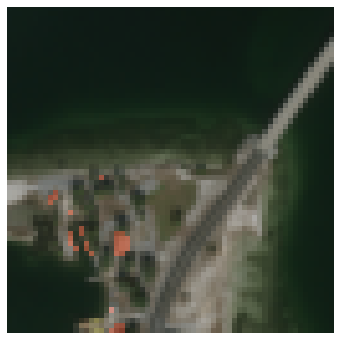

In [51]:
show_sample(x[1], y[1])

### Forward pass through untrained model

In [52]:
pred = model(x)

In [53]:
pred.shape

torch.Size([4, 2, 64, 64])

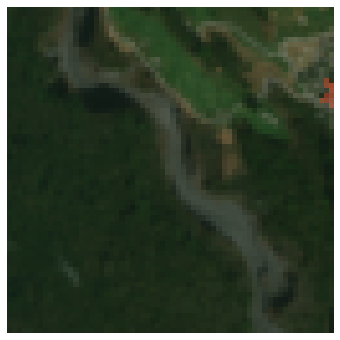

In [71]:
show_sample(x[0], y[0])

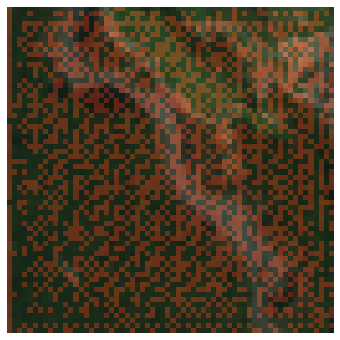

In [69]:
show_sample(x[0], pred.argmax(dim=1)[0][None,...].float().div_(255.))

# -fin

In [7]:
! python notebook2script.py 02_model.ipynb

Converted 02_model.ipynb to xview2comp/nb_02.py
